# Glauber on infinite random $k$-regular graph
Compute magnetization in the thermodynamic limit $N\to\infty$.

Reproduce the results in *Barthel et. al*, [Matrix product algorithm for stochastic dynamics on networks applied to nonequilibrium Glauber dynamics](https://doi.org/10.1103/PhysRevE.97.010104) for $T=50, J=β=1, h=0, m⁰ = 0.5, k=3$.

In [1]:
using MatrixProductBP, MatrixProductBP.Models
using Graphs, IndexedGraphs, Plots, LaTeXStrings
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

In [2]:
T = 30         # final time
k = 3          # degree
m⁰ = 0.5       # magnetization at time zero

β = 1.0
J = 1.0
h = 0.0;

In [3]:
wᵢ = fill(HomogeneousGlauberFactor(J, h, β), T+1)
ϕᵢ = [ t == 0 ? [(1+m⁰)/2, (1-m⁰)/2] : ones(2) for t in 0:T]
bp = mpbp_infinite_graph(k, wᵢ, 2, ϕᵢ)
cb = CB_BP(bp);

In [4]:
matrix_sizes = [5, 15, 20]
maxiters = fill(50, length(matrix_sizes))
iters = zeros(Int, length(maxiters))
tol = 1e-3
for i in eachindex(maxiters)
    iters[i], _ = iterate!(bp; maxiter=maxiters[i], svd_trunc=TruncBond(matrix_sizes[i]), cb, tol)
end

┌ Warning: #= /home/stecrotti/.julia/packages/Tullio/NGyNM/src/macro.jl:1093 =#:
│ `LoopVectorization.check_args` on your inputs failed; running fallback `@inbounds @fastmath` loop instead.
│ Use `warn_check_args=false`, e.g. `@turbo warn_check_args=false ...`, to disable this warning.
└ @ MatrixProductBP.Models /home/stecrotti/.julia/packages/LoopVectorization/GDXSk/src/condense_loopset.jl:1148
┌ Warning: #= /home/stecrotti/.julia/packages/Tullio/NGyNM/src/macro.jl:1093 =#:
│ `LoopVectorization.check_args` on your inputs failed; running fallback `@inbounds @fastmath` loop instead.
│ Use `warn_check_args=false`, e.g. `@turbo warn_check_args=false ...`, to disable this warning.
└ @ MatrixProductBP.Models /home/stecrotti/.julia/packages/LoopVectorization/GDXSk/src/condense_loopset.jl:1148


Running MPBP: iter 2 	 Time: 0:00:22
  Δ:                0.3092196750238969
  SVD Matrix size:  5

Running MPBP: iter 5 	 Time: 0:00:22
  Δ:                0.350509640006998
  SVD Matrix size:  5

Running MPBP: iter 7 	 Time: 0:00:22
  Δ:                0.906102463864279
  SVD Matrix size:  5

Running MPBP: iter 9 	 Time: 0:00:22
  Δ:                0.9301298805390465
  SVD Matrix size:  5

Running MPBP: iter 11 	 Time: 0:00:23
  Δ:                0.3570873336511524
  SVD Matrix size:  5

Running MPBP: iter 13 	 Time: 0:00:23
  Δ:                0.7014512857250561
  SVD Matrix size:  5

Running MPBP: iter 15 	 Time: 0:00:23
  Δ:                0.07577325061761542
  SVD Matrix size:  5

Running MPBP: iter 17 	 Time: 0:00:23
  Δ:                0.030242132618861994
  SVD Matrix size:  5

Running MPBP: iter 19 	 Time: 0:00:23
  Δ:                0.011499222391205599
  SVD Matrix size:  5

Running MPBP: iter 21 	 Time: 0:00:23
  Δ:                0.00969886133721598
  SVD Matrix size:  5

Running MPBP: iter 23 	 Time: 0:00:24
  Δ:                0.005159296303676175
  SVD Matrix size:  5

Running MPBP: iter 25 	 Time: 0:00:24
  Δ:                0.0018533032095815472
  SVD Matrix size:  5

Running MPBP: iter 27 	 Time: 0:00:24
  Δ:                0.048105681037208914
  SVD Matrix size:  15

Running MPBP: iter 28 	 Time: 0:00:37
  Δ:                0.02003778440393522
  SVD Matrix size:  15

Running MPBP: iter 29 	 Time: 0:00:49
  Δ:                0.016514838902387474
  SVD Matrix size:  15

Running MPBP: iter 30 	 Time: 0:01:01
  Δ:                0.011180675155577635
  SVD Matrix size:  15

Running MPBP: iter 31 	 Time: 0:01:14
  Δ:                0.008070208275486879
  SVD Matrix size:  15

Running MPBP: iter 32 	 Time: 0:01:28
  Δ:                0.005027059943223389
  SVD Matrix size:  15

Running MPBP: iter 33 	 Time: 0:01:41
  Δ:                0.0030203092287512945
  SVD Matrix size:  15

Running MPBP: iter 34 	 Time: 0:01:54
  Δ:                0.002119146554614204
  SVD Matrix size:  15

Running MPBP: iter 35 	 Time: 0:02:06
  Δ:                0.0015156111261687144
  SVD Matrix size:  15

Running MPBP: iter 36 	 Time: 0:02:18
  Δ:                0.0011106658313166928
  SVD Matrix size:  15

Running MPBP: iter 37 	 Time: 0:02:31
  Δ:                0.0008075525736555011
  SVD Matrix size:  15

Running MPBP: iter 38 	 Time: 0:02:49
  Δ:                0.004605450354489893
  SVD Matrix size:  20

Running MPBP: iter 39 	 Time: 0:03:45
  Δ:                0.0011975094710365841
  SVD Matrix size:  20

Running MPBP: iter 40 	 Time: 0:04:42
  Δ:                0.0009910278585332222
  SVD Matrix size:  20

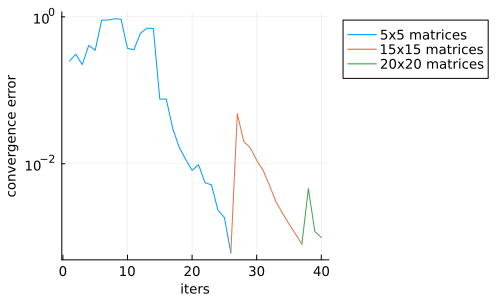

In [5]:
iters_cum = cumsum(iters)
inds = 1:iters_cum[1]
pl = plot(inds, cb.Δs[inds], label="$(matrix_sizes[1])x$(matrix_sizes[1]) matrices")
for i in 2:length(iters)
    inds = iters_cum[i-1]:iters_cum[i]
   plot!(pl, inds, cb.Δs[inds], label="$(matrix_sizes[i])x$(matrix_sizes[i]) matrices")
end
plot(pl, ylabel="convergence error", xlabel="iters", yaxis=:log10, size=(500,300), legend=:outertopright)

In [6]:
spin(x, i) = 3-2x
spin(x) = spin(x, 0)
m = only(means(spin, bp));

In [13]:
pb = pair_beliefs_as_mpem(bp)[1][1]
compress!(pb; svd_trunc=TruncBond(15))
mtu = twovar_marginals(pb; Δlmax=1)
r = [expectation(spin, dropdims(sum(sum(mtu[t,t+1], dims=2), dims=3); dims=(2,3))) 
    for t in 1:T];

In [14]:
m_eq, r_eq, e_eq = equilibrium_observables(RandomRegular(k), J; β, h)

(m = 0.9917570032084977, r = 0.9861516673634358, e = -1.4792275010451537)

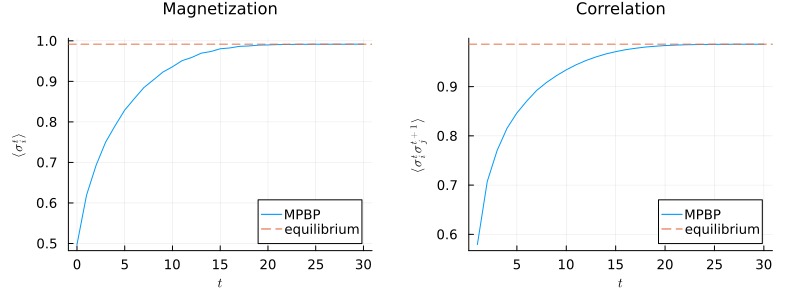

In [15]:
pl_m = plot(0:T, m, xlabel=L"t", ylabel=L"\langle \sigma_i^t \rangle", msc=:auto,
    size=(500,300), xticks=0:5:T, ms=2, label="MPBP", legend=:bottomright)
hline!(pl_m, [m_eq], label="equilibrium", ls=:dash, title="Magnetization")

pl_r = plot(1:T, r, xlabel=L"t", ylabel=L"\langle \sigma_i^t\sigma_j^{t+1} \rangle", msc=:auto,
    size=(500,300), xticks=0:5:T, ms=2, label="MPBP", legend=:bottomright)
hline!(pl_r, [r_eq], label="equilibrium", ls=:dash, title="Correlation")

plot(pl_m, pl_r, size=(800,300), margin=5Plots.mm)

In [24]:
using Statistics
import Measurements: value
N = 10^3
g = random_regular_graph(N, k)
ising = Ising(IndexedGraph(g); J=fill(J, ne(g)), h=fill(h, N), β)
bp_mc = mpbp(Glauber(ising, T); ϕ = fill(ϕᵢ, N))
sms = SoftMarginSampler(bp_mc);

In [25]:
sample!(sms, 10^3);

SoftMargin sampling 100%|████████████████████████████████| Time: 0:00:06


In [46]:
c_mc_ = autocovariances(spin, sms)
c_mc = [[value(x) for x in xx] for xx in c_mc_];

Autocorrelations from Soft Margin 100%|██████████████████| Time: 0:00:27
Marginals from Soft Margin 100%|█████████████████████████| Time: 0:00:01


In [47]:
c = autocovariances(spin, bp);

In [48]:
plot_autocovs(args...; kw...) = plot_autocovs!(plot(), args...; kw...)
function plot_autocovs!(pl, c; skip_even=false, T=size(c,1)-1, ΔT=1.0, 
        us=0:(2*floor(Int, T/10)):T, cg = cgrad(:matter, length(us)+1, categorical=true), 
        kw...)
    step = skip_even ? 2 : 1
    ylabel = L"\langle x_{i}^t x_{i}^{s}\rangle-\langle x_{i}^t\rangle\langle x_{i}^{s}\rangle"
    xlabel = L"t-s"
    plot!(pl; xlabel, ylabel, legend=:outertopright)
     
    for (j,u) in enumerate(us)
        plot!(pl, (u:-step:1).*ΔT, c[(0:step:u-1) .+ 1,u+1], label="t=$(Int(u*ΔT))", #label="t+Δt=$(Int(u*ΔT))", 
            c=cg[j+1], msc=:auto; kw...) 
    end
    pl
end 

plot_autocovs! (generic function with 1 method)

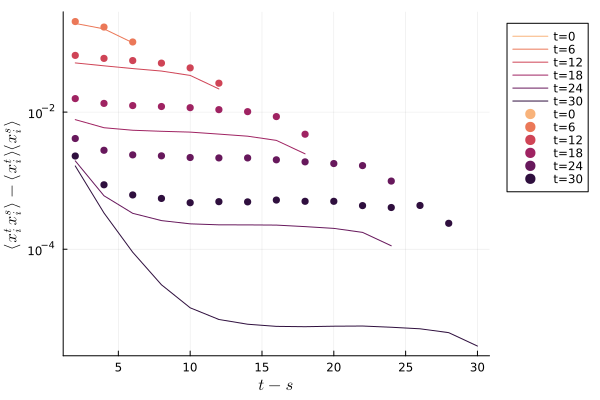

In [49]:
skip_even = true
pl = plot_autocovs(mean(c); skip_even, yaxis=:log10)
plot_autocovs!(pl, replace(x-> x>0 ? x : NaN, mean(c_mc)); st=:scatter, skip_even)